<div class="alert alert-info">
<b>Задание № 1</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [40]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)
stat, p = mannwhitneyu(A, B) 
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05   
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')
#Поскольку pvalue > 0.05, мы не отклоняем нулевую гипотезу и говорим, что разница статистически не значима

Statistics=4343.000, p=0.054
Одинаковые распределения (не отвергаем H0)


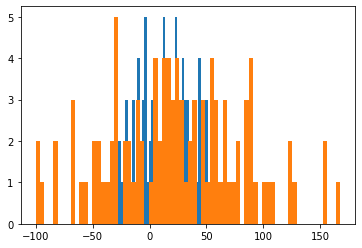

In [41]:
plt.hist(A, bins=70)
plt.hist(B, bins=70)
plt.show()

<div class="alert alert-info">
<b>Задание № 2</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [18]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)
stats.ttest_ind(A, B)

Ttest_indResult(statistic=-1.733800647210997, pvalue=0.08451003973499756)

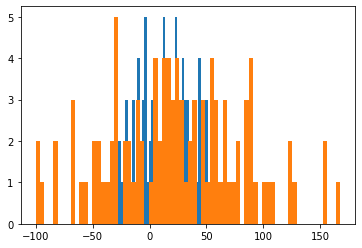

In [19]:
plt.hist(A, bins=70)
plt.hist(B, bins=70)
plt.show()


<div class="alert alert-info">
<b>Задание № 3</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

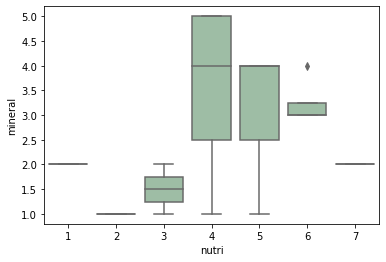

In [38]:
from scipy.stats import f_oneway
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

df_grow = pd.DataFrame({'nutri':nutri, 'mineral':mineral})
ax = sns.boxplot(x='nutri', y='mineral', data=df_grow, color='#99c2a2')
plt.show()
#не очень понимаю, как читать этот график. Значит ли это, что результаты, которые дают использование удобрений, лежат в плоскости
#от 2,5 до 5.0, в отличие от минералки? Вроде бы же отдельный боксплот - это отедльное измерение? Но тогда не очень понятно, как
#интерпретировать это. Удобрения лучше минералки?

In [37]:
F, p = stats.f_oneway(water, nutri, mineral)

alpha = 0.05  
print(F, p)  

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')
#следовательно, результаты есть

12.525963044834192 2.9240047906326866e-05
Разное распределение (отклоняем H0)


<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=400></p>


# Данные A/B тестирования

In [45]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

`userid` - уникальный номер, идентифицирующий каждого игрока.

версия - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

`sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки

`retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?

`retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиция для подтверждения ваших выводом. 
</div>

In [46]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


### Выводы:
По предыдущей ячейке видно, что объём выборок приблизительно равен, следовательно, можно проводить тестирование для несвязанных выборок. 

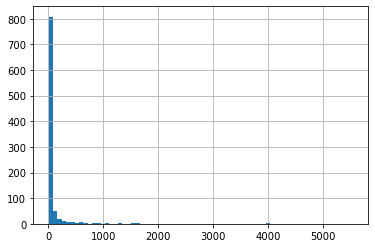

In [108]:
# Подсчет количества игроков для каждого количества раундов
plot_df = data.groupby('sum_gamerounds')['userid'].count()
plot_df.hist(bins=70)  # попробуйте поварировать параметр bins

**Ваши выводы**

Чем выше я выставляю параметр bins, тем ниже становится шкала уровней. И, честно говоря, я не понимаю, почему так происходит. При bins = 150 она превышает значение 700, а при bins = 1000 не доходит и до 100. Почему, напишите, пожалуйста?
Что касается самих данных, чем выше уровень игры, тем меньше людей в него играло.

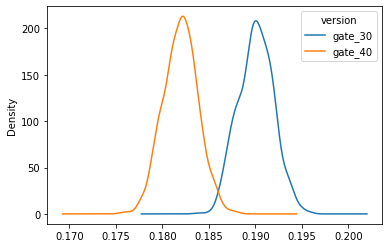

In [112]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean) #можете, пожалуйста, пояснить, как именно работает этот код? Синтаксически не понятно=((
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

**Ваши выводы?**
По графику плотности видно, что в среднем конверсия для игроков, которые проходили через ворота на 30-м уровне, выше конверсии для того же количества игроков, которые проходили ворота на 40-м уровне. То есть уже на этом этапе получается, что гейт на 30-м уровне даёт конверсию примерно на 1% больше.

#### Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот.

In [123]:
from scipy.stats import f_oneway 
#from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

# Ваш код. 
#f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1009027049.500, p=0.025


**Вывод**:

Поскольку мы получили значение p < alpha, то делаем вывод, что распределения разнятся и ворота лучше оставить на 30 уровне.